In [1]:
library(tidyverse)
library(readxl)
library(plyr)
library(tibble)
library(ggplot2)
library(ggpubr)
library(RColorBrewer)
library(ggsignif) #添加显著性标记的包
library(rstatix)
library(PupillometryR)
data=readRDS('../../data/GTEX/gtex_skin_tpm_data.rds')
col=readRDS('../../data/GTEX/gtex_skin_colData.rds')
head(data,2)
head(col,2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate,

,GTEX-OXRL-0008-SM-3NB29.1,GTEX-11P82-1426-SM-DTXFY.1,GTEX-1269C-0008-SM-5TDBY.1,GTEX-13O3O-0126-SM-E9J49.1,GTEX-14BMU-2226-SM-5TDE9.1,GTEX-14E7W-0126-SM-6LLJ9.1,GTEX-15RJE-2826-SM-7KUM9.1,GTEX-15UKP-1526-SM-6PAL9.1,GTEX-16A39-0008-SM-EAZC9.1,GTEX-16AAH-0626-SM-793C9.1,⋯,GTEX-1LVAO-2726-SM-E9TJ8.1,GTEX-1MCC2-1826-SM-DIPEX.1,GTEX-1MUQO-0126-SM-EAZ58.1,GTEX-1OJC3-0126-SM-E76QX.1,GTEX-1PDJ9-1226-SM-EXUSX.1,GTEX-1PPH7-2326-SM-EVYB8.1,GTEX-1PPH8-0126-SM-EWRN8.1,GTEX-1QMI2-0226-SM-EVYBX.1,GTEX-1QP29-0626-SM-EWRMX.1,GTEX-1QP67-1626-SM-EAZ3X.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,3.083407,1.825569,5.779922,1.133507,1.77572,1.588412,1.345985,1.967319,7.382855,2.232559,⋯,2.834128,2.343052,1.661869,1.629348,2.471927,2.058313,0.764092,1.075784,2.244032,2.869755
A1BG-AS1,5.768519,3.151364,7.391211,2.228905,5.65030,2.608007,1.707010,5.327222,10.127714,5.635800,⋯,3.470114,4.920937,1.851354,1.926978,3.900034,3.586604,1.295198,1.752216,3.295250,3.069627


,external_id,study,gtex.run_acc,gtex.age,gtex.smtsd,age2,age_group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GTEX-OXRL-0008-SM-3NB29.1,GTEX-OXRL-0008-SM-3NB29.1,SKIN,SRR813171,50-59,Cells - Cultured fibroblasts,50,middle
GTEX-11P82-1426-SM-DTXFY.1,GTEX-11P82-1426-SM-DTXFY.1,SKIN,NA,20-29,Skin - Not Sun Exposed (Suprapubic),20,young


In [4]:
ex.col=col[col$group=='exposed',]
ex.col$age_group=paste0(ex.col$gtex.age,'_',ex.col$group)
head(ex.col,2)
ex.sample=rownames(ex.col)
length(ex.sample)

,external_id,study,gtex.run_acc,gtex.age,gtex.smtsd,age2,age_group,group
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GTEX-13O3O-0126-SM-E9J49.1,GTEX-13O3O-0126-SM-E9J49.1,SKIN,NA,60-69,Skin - Sun Exposed (Lower leg),60,60-69_exposed,exposed
GTEX-14BMU-2226-SM-5TDE9.1,GTEX-14BMU-2226-SM-5TDE9.1,SKIN,NA,20-29,Skin - Sun Exposed (Lower leg),20,20-29_exposed,exposed


[1] 604

# heatmap

In [5]:
sabm=read.csv('BMpipeline-SApaper.csv')
head(sabm,2)
bm.confirmed=sabm[sabm$Category=='Basement membrane'&sabm$supportance=='confirmed','Gene.symbol']
length(bm.confirmed)

,Gene.symbol,Category,Mouse.ortholog,supportance
,<chr>,<chr>,<chr>,<chr>
1,ACAN,Basement membrane,Acan,confirmed
2,ACHE,Basement membrane,Ache,confirmed


[1] 139

In [6]:
ECM=read.csv('matrisome_hs_masterlist.csv')
ECM=ECM[,c('Gene.Symbol','Division','Category','Synonyms')]
rownames(ECM)=ECM$Gene.Symbol
anno=ECM[bm.confirmed[bm.confirmed%in%ECM$Gene.Symbol],]
#table(rownames(bm.confirmed)==bm.confirmed)
head(anno,2)
class=names(table(ECM$Category))
class

,Gene.Symbol,Division,Category,Synonyms
,<chr>,<chr>,<chr>,<chr>
ACAN,ACAN,Core matrisome,Proteoglycans,AGC1|AGCAN|CSPG1|CSPGCP|MSK16|SEDK
ADAMTS1,ADAMTS1,Matrisome-associated,ECM Regulators,C3-C5|KIAA1346|METH1


[1] "Collagens"               "ECM Glycoproteins"      
[3] "ECM Regulators"          "ECM-affiliated Proteins"
[5] "Proteoglycans"           "Secreted Factors"

In [9]:
for(i in class){
    gene=ECM[ECM$Category==i,'Gene.Symbol']
    write.table(gene,paste0(i,'.txt'),row.names = F,quote = F,col.names = F)
}
write.table(unique(ECM$Gene.Symbol),paste0('allECM','.txt'),row.names = F,quote = F,col.names = F)

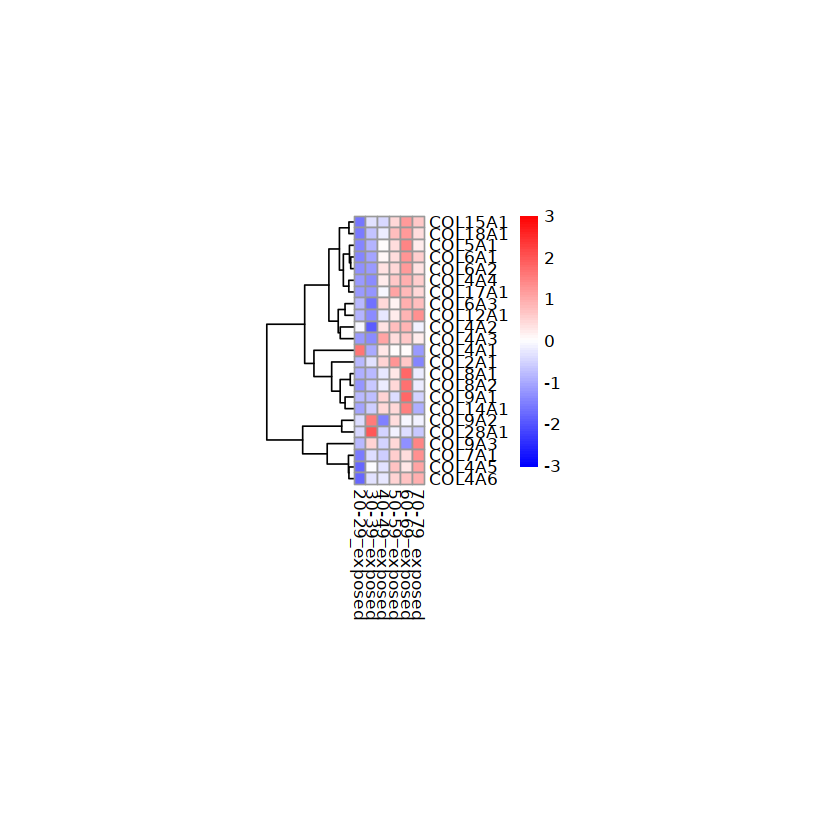

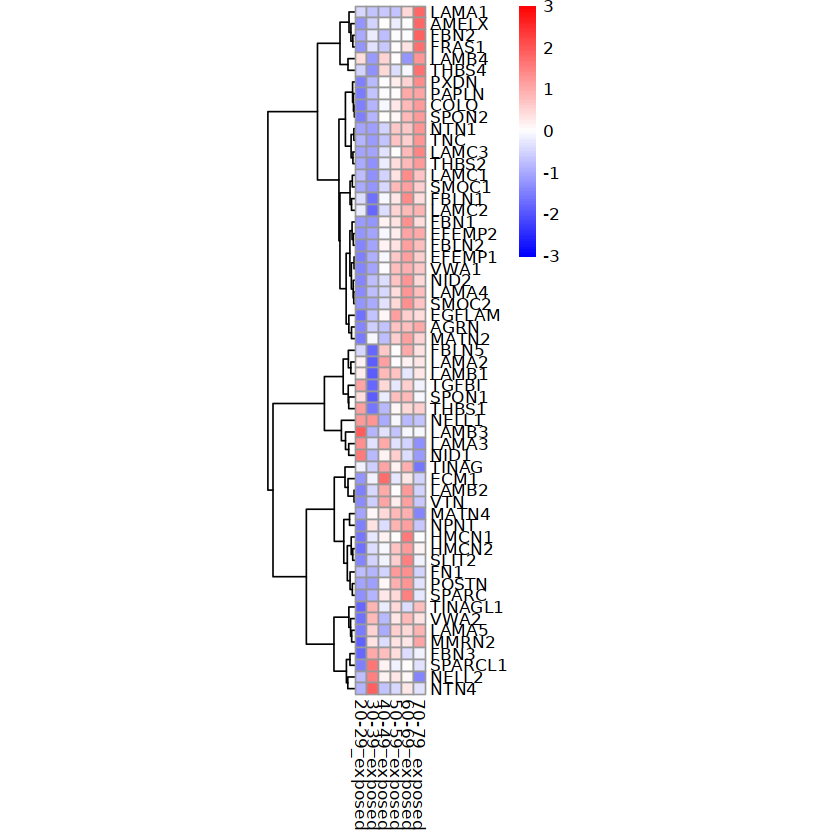

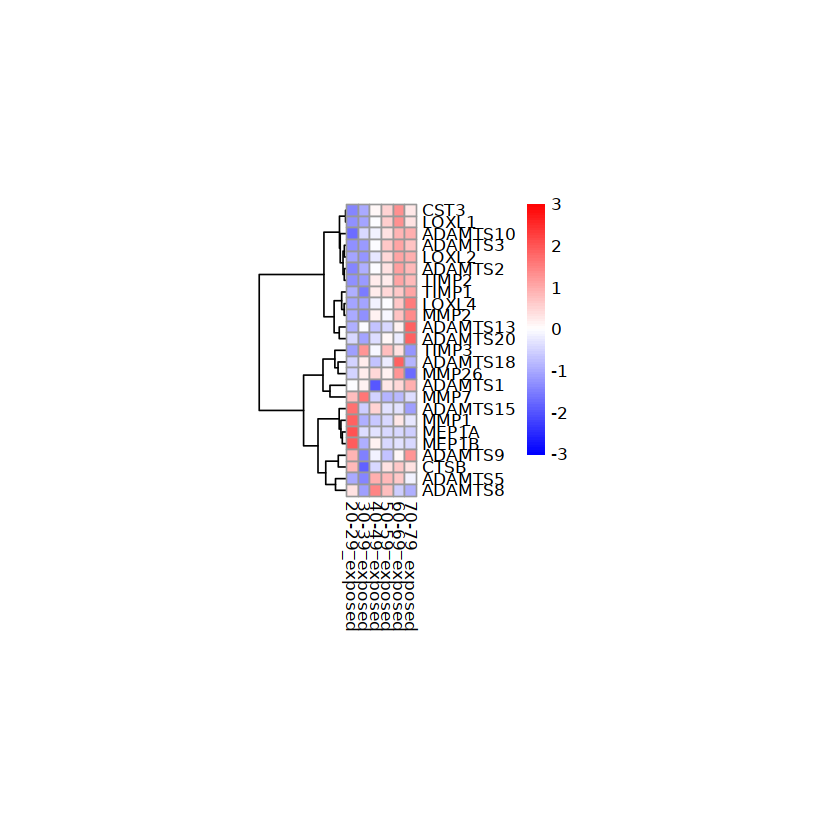

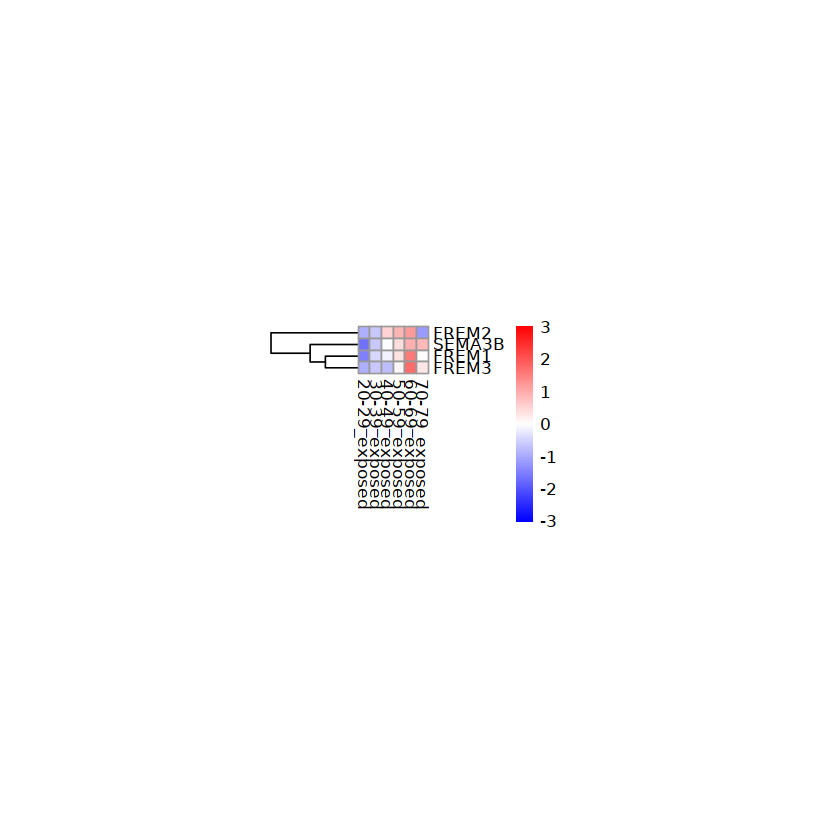

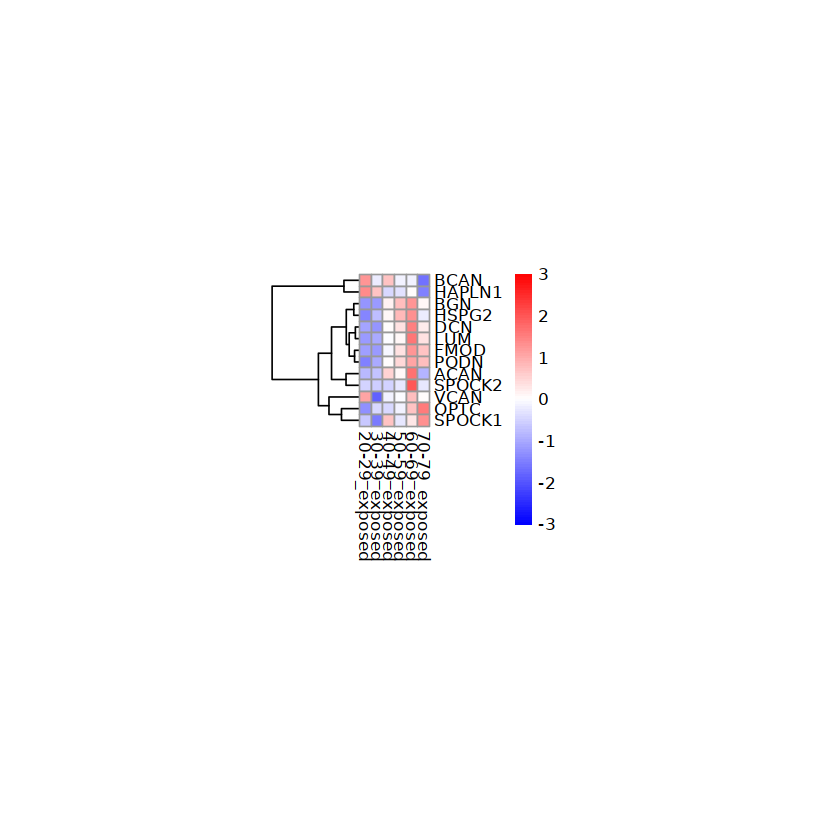

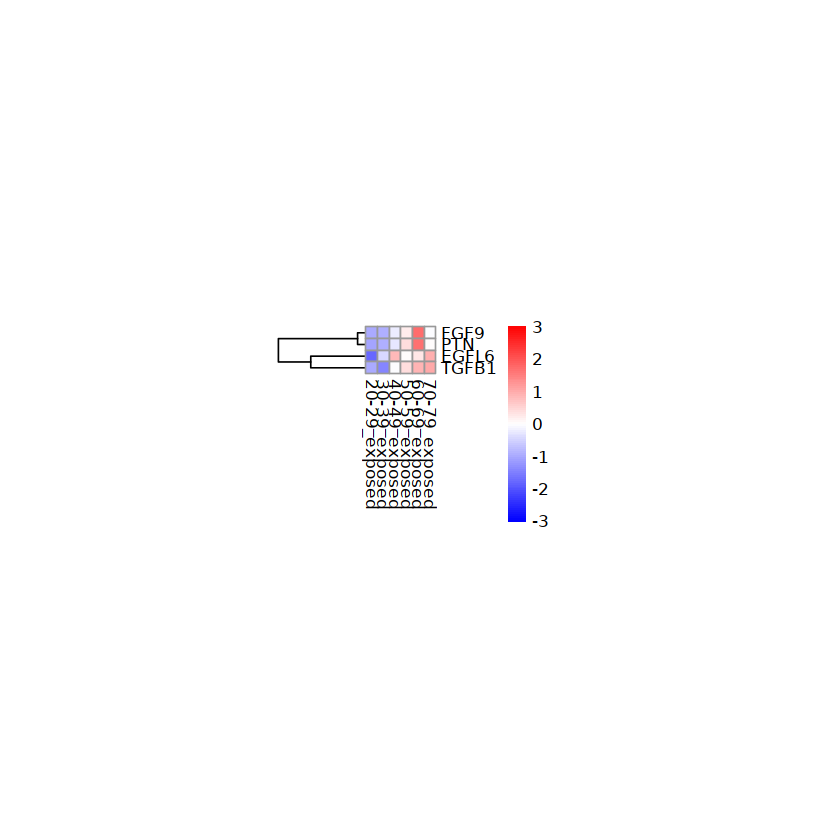

In [7]:
for(i in class){
    gene=anno[anno$Category==i,'Gene.Symbol']
    plot.data=data[gene[gene%in%rownames(data)],ex.sample]
    
    cellTypes=ex.col
    selectedTypes='age_group'
    cellsPerGroup <- split(rownames(cellTypes), 
                       cellTypes[,selectedTypes]) 
    expr_byGroup <- sapply(cellsPerGroup,
                                  function(cells) 
                                     # apply(plot.data[,cells],1,median)
                                      rowMeans(plot.data[,cells])
                                    )
    expr_byGroup=as.data.frame(expr_byGroup)
    expr_byGroup=expr_byGroup[,c('20-29_exposed','30-39_exposed','40-49_exposed','50-59_exposed','60-69_exposed','70-79_exposed')]
    library(pheatmap)
    plot2=pheatmap(expr_byGroup,show_rownames = T,scale='row',clustering_method = 'ward.D', show_colnames = T,
               cellwidth =7,cellheight = 7,
                         cluster_cols = F,cluster_rows = T,#clustering_method ='centroid',
                         color=colorRampPalette(c("blue","white","red"))(100), breaks=seq(-3, 3, length.out = 100)
    )
    ggsave(paste0(i,'.heatmap.png'),plot2, width=3, height=8)
}